In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv("FONTS.csv")

In [34]:
typeface_columns = [col for col in df.columns if "Typeface Style" in col]
df_filtered = df[["Municipality", "Photo name"] + typeface_columns]
df_melted = df_filtered.melt(id_vars=["Municipality", "Photo name"], value_vars=typeface_columns, 
                             var_name="Typeface Style Column", value_name="Typeface Style Updated")
df_melted = df_melted.dropna()  # Remove empty values
df_melted.head()

,Municipality,Photo name,Typeface Style Column,Typeface Style Updated
0,Yorba Linda,YorbaLinda6.jpeg,Typeface Style (8),Quirky
1,Yorba Linda,YorbaLinda5.jpeg,Typeface Style (8),Quirky
2,Yorba Linda,YorbaLinda2.jpeg,Typeface Style (8),Quirky
3,Yorba Linda,YorbaLinda1.jpeg,Typeface Style (8),Serif
4,Los Alamitos,P1010185.JPG,Typeface Style (8),Slab Serif


In [35]:
df_grouped = df_melted.groupby(["Municipality", "Typeface Style Updated"]).size().reset_index(name="Count")
df_grouped

,Municipality,Typeface Style Updated,Count
0,Costa Mesa,Other,4
1,Costa Mesa,Sans Serif,61
2,Costa Mesa,"Sans Serif,Stylized",1
3,Costa Mesa,Serif,29
4,Costa Mesa,"Serif,Stylized",3
...,...,...,...
96,Aliso Viejo,Serif,15
97,Aliso Viejo,Stylized,3
98,Aliso Viejo,"Stylized,Quirky,Sans Serif",1
99,Aliso Viejo,"Stylized,Sans Serif",1


In [36]:
df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style Updated", values="Count").fillna(0)
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)

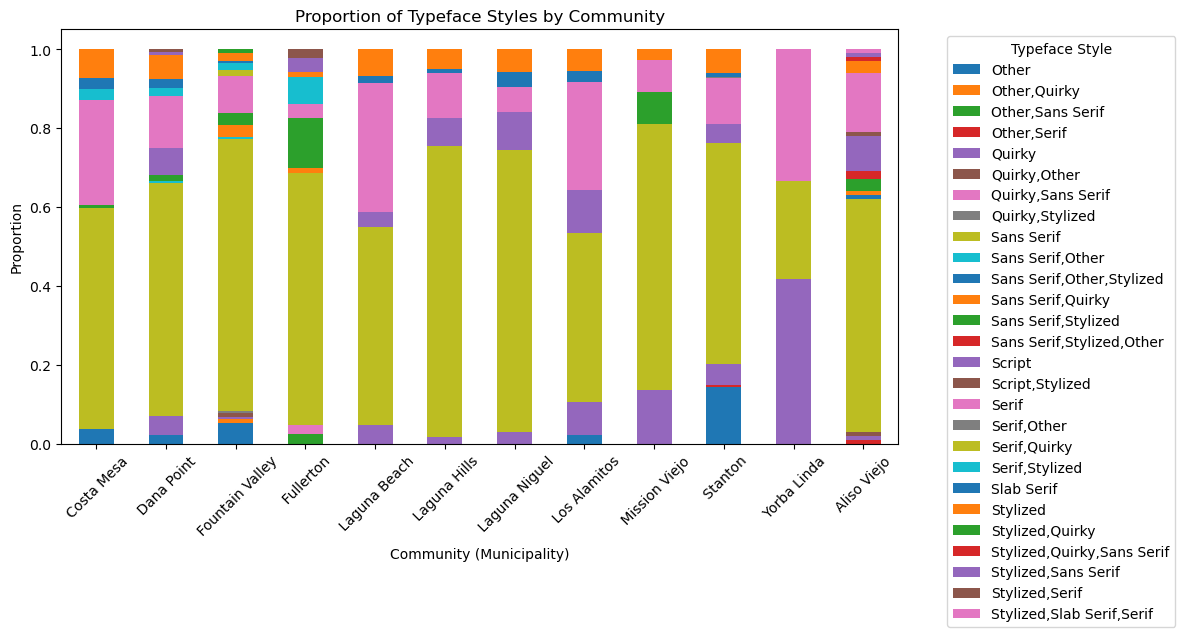

In [37]:
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proportion of Typeface Styles by Community")
plt.xlabel("Community (Municipality)")
plt.ylabel("Proportion")
plt.legend(title="Typeface Style", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Typeface Style    Total
Municipality           
 Costa Mesa        82.0
 Dana Point       111.0
 Fountain Valley  113.0
 Fullerton         52.0
 Laguna Beach     128.0
 Laguna Hills     119.0
 Laguna Niguel     84.0
 Los Alamitos     126.0
 Mission Viejo     31.0
 Stanton          152.0
 Yorba Linda      103.0
Aliso Viejo        88.0


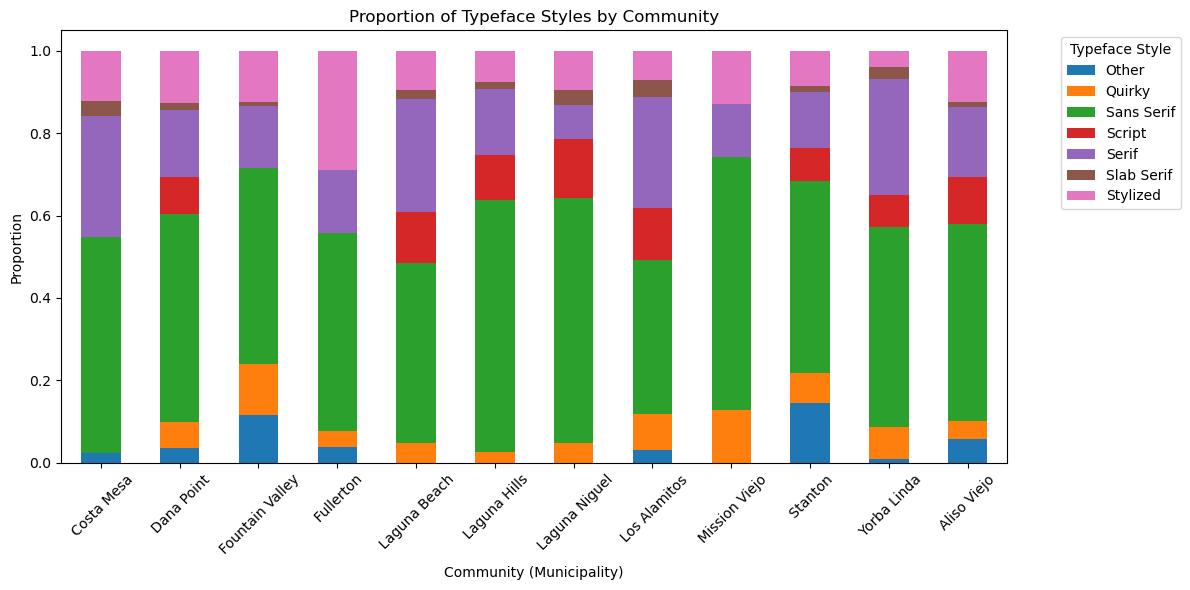

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("FONTS.csv")

# Identify all columns related to "Typeface Style"
typeface_columns = [col for col in df.columns if "Typeface Style" in col]

# Initialize an empty list to store (Municipality, Typeface Style) pairs
records = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    municipality = row["Municipality"]
    # Use a set to avoid duplicate typefaces within the same row
    fonts_set = set()
    
    # Loop over each typeface column
    for col in typeface_columns:
        value = row[col]
        if pd.notna(value):
            # Split the value by comma to get individual fonts,
            # and remove any leading/trailing whitespace
            fonts = [font.strip() for font in str(value).split(',') if font.strip() != ""]
            for font in fonts:
                fonts_set.add(font)
    
    # Add each unique font to the records list with its municipality
    for font in fonts_set:
        records.append({"Municipality": municipality, "Typeface Style": font})

# Create a new DataFrame from the records
df_fonts = pd.DataFrame(records)
# Group by Municipality and Typeface Style to count occurrences
df_grouped = df_fonts.groupby(["Municipality", "Typeface Style"]).size().reset_index(name="Count")
# Pivot the table so that each row represents a municipality and each column a typeface style
df_pivot = df_grouped.pivot(index="Municipality", columns="Typeface Style", values="Count").fillna(0)
df_pivot["Total"] = df_pivot.sum(axis=1)
print(df_pivot[["Total"]])
del df_pivot["Total"]
# Convert counts to proportions by dividing each row by its sum
df_pivot = df_pivot.div(df_pivot.sum(axis=1), axis=0)

# Plot the results as a stacked bar chart
df_pivot.plot(kind="bar", stacked=True, figsize=(12, 6))
plt.title("Proportion of Typeface Styles by Community")
plt.xlabel("Community (Municipality)")
plt.ylabel("Proportion")
plt.legend(title="Typeface Style", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()